In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic')
plt.rc('axes',unicode_minus=False)
%matplotlib inline 

In [4]:
df=pd.read_csv("Data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)

In [18]:
null_count=df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<AxesSubplot:>

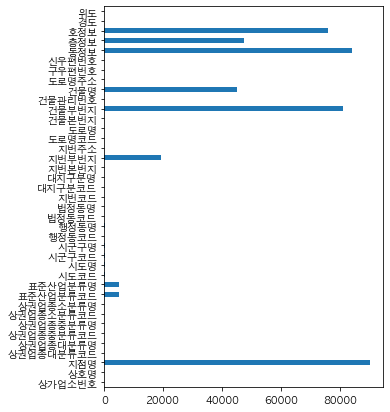

In [20]:
null_count.plot.barh(figsize=(5,7))

In [24]:
df_null=null_count.reset_index()
df_null.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [29]:
df_null.columns=['컬럼명','결측지수']
df_null.head()

,컬럼명,결측지수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [36]:
df_top=df_null.sort_values(by="결측지수",ascending=False).head(5)

In [39]:
df["지점명"].head()  #NaN=Notanumber

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [42]:
drop_col=df_top["컬럼명"].tolist()
drop_col

['지점명', '동정보', '건물부번지', '호정보', '층정보']

In [43]:
df[drop_col].head()

,지점명,동정보,건물부번지,호정보,층정보
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,4
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,5
4,수지점,NaN,NaN,NaN,1


In [44]:
df.drop(drop_col,axis=1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,도로명코드,도로명,건물본번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,경도,위도
0,19956873,하나산부인과,S,의료,S01,병원,S01B10,산부인과,Q86201,일반 의원,...,412733191011,경기도 안산시 단원구 달미로,10,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,126.814295,37.336344
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,Q86201,일반 의원,...,116804166604,서울특별시 강남구 언주로30길,39,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,127.053198,37.488742
2,20152277,조정현신경외과의원,S,의료,S01,병원,S01B15,신경외과,Q86201,일반 의원,...,413903199049,경기도 시흥시 중심상가로,178,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,126.734841,37.344955
3,20350610,한귀원정신과의원,S,의료,S01,병원,S01B99,기타병원,NaN,NaN,...,265003131037,부산광역시 수영구 수영로,688,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,129.115438,35.166872
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,의약품 및 의료용품 소매업,...,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,16196725,온누리약국,S,의료,S02,약국/한약방,S02A01,약국,G47811,의약품 및 의료용품 소매업,...,301703166026,대전광역시 서구 문예로,67,3017011200115070000021096,NaN,대전광역시 서구 문예로 67,302831.0,35240.0,127.389865,36.352728
91331,16192180,리원,S,의료,S07,의료관련서비스업,S07A07,산후조리원,S96993,개인 간병인 및 유사 서비스업,...,412813192038,경기도 고양시 덕양구 성신로,14,4128112300111460000011715,청한프라자,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,126.830144,37.627530
91332,16127538,참좋은요양병원,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,일반 병원,...,264103130022,부산광역시 금정구 금강로,209,2641010800105380001005572,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,129.082790,35.227138
91333,16108681,경희중앙한의원,S,의료,S01,병원,S01B06,한의원,Q86203,한의원,...,117403124009,서울특별시 강동구 천중로,213,1174010500103450009002392,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,127.143958,37.540993
